<a href="https://colab.research.google.com/github/gkr0828/gkr0828/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_7%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
##데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# 4-1 가중치 초기화
1. he_uniform : 활성화 함수가 ReLU인 경우 사용
2. glorot_uniform : 활성화 함수가 Sigmoid, Taha 인 경우 사용



In [ ]:
##가중치를 적용하지 않은 경우
model = tf.keras.Sequential ([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(64, activation = 'relu'),
                              tf.keras.layers.Dense(32, activation = 'relu'),
                              tf.keras.layers.Dense(10, activation = 'softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##kernel_initializer = 'uniform'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'uniform',activation='relu')

In [ ]:
##kernel_initializer = 'normal'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'normal',activation='relu')

In [ ]:
##kernel_initializer = 'he_normal'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'he_normal',activation='relu')

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3958 - accuracy: 0.7581 - val_loss: 0.5409 - val_accuracy: 0.8607
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3870 - accuracy: 0.8992 - val_loss: 0.3736 - val_accuracy: 0.9226
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2621 - accuracy: 0.9294 - val_loss: 0.2191 - val_accuracy: 0.9431
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1996 - accuracy: 0.9457 - val_loss: 0.1944 - val_accuracy: 0.9513
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1704 - accuracy: 0.9528 - val_loss: 0.1656 - val_accuracy: 0.9542
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1425 - accuracy: 0.9610 - val_loss: 0.1499 - val_accuracy: 0.9622
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1286 - accuracy: 0.9647 - val_loss: 0.1412 - val_accuracy

In [ ]:
##kernel_initializer = 'he_normal' 을 적용한 경우
model_w_he = tf.keras.Sequential ([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(64, kernel_initializer = 'he_normal', activation = 'relu'),
                              tf.keras.layers.Dense(32, activation = 'relu'),
                              tf.keras.layers.Dense(10, activation = 'softmax')])
model_w_he.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_w_he.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_w_he = model_w_he.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6182 - accuracy: 0.6982 - val_loss: 0.5934 - val_accuracy: 0.8337
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4980 - accuracy: 0.8651 - val_loss: 0.4159 - val_accuracy: 0.8873
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3291 - accuracy: 0.9112 - val_loss: 0.2757 - val_accuracy: 0.9285
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2457 - accuracy: 0.9336 - val_loss: 0.2349 - val_accuracy: 0.9378
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1989 - accuracy: 0.9452 - val_loss: 0.1996 - val_accuracy: 0.9471
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1684 - accuracy: 0.9531 - val_loss: 0.1867 - val_accuracy: 0.9493
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1511 - accuracy: 0.9580 - val_loss: 0.1599 - val_accu

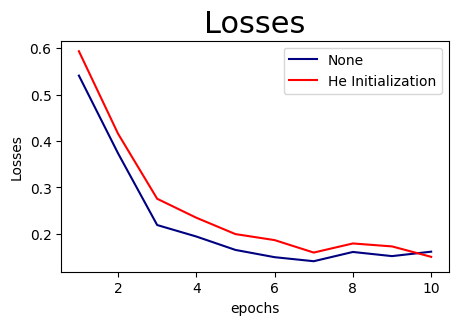

In [ ]:
#두 모델 비교 시작화
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,11),history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11),history_w_he.history['val_loss'], color = 'red', label = 'He Initialization')
plt.title("Losses", fontsize = 22)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show()

In [ ]:
##kernel_initializer = 'glorot_normal' 을 적용한 경우
model_w_gl = tf.keras.Sequential ([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(64, kernel_initializer = 'glorot_normal', activation = 'sigmoid'),
                              tf.keras.layers.Dense(32, activation = 'sigmoid'),
                              tf.keras.layers.Dense(10, activation = 'softmax')])
model_w_gl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_w_gl.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_w_gl = model_w_gl.fit(x_train, y_train, validation_data = (x_test, y_test), epochs =10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8063 - accuracy: 0.7952 - val_loss: 0.4399 - val_accuracy: 0.8780
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4096 - accuracy: 0.8788 - val_loss: 0.3686 - val_accuracy: 0.8870
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3756 - accuracy: 0.8855 - val_loss: 0.3504 - val_accuracy: 0.8948
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3357 - accuracy: 0.8967 - val_loss: 0.3384 - val_accuracy: 0.9004
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3231 - accuracy: 0.9011 - val_loss: 0.3043 - val_accuracy: 0.9060
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3051 - accuracy: 0.9052 - val_loss: 0.3118 - val_accuracy: 0.9029
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2982 - accuracy: 0.9067 - val_loss: 0.2824 - val_accuracy:

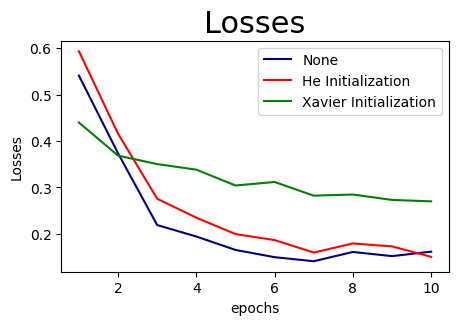

In [ ]:
#세 모델 시각화
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,11),history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11),history_w_he.history['val_loss'], color = 'red', label = 'He Initialization')
plt.plot(np.arange(1,11),history_w_gl.history['val_loss'], color = 'green', label = 'Xavier Initialization')
plt.title("Losses", fontsize = 22)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show()

# 4-2 규제(Regularization)


1. L1 : 가중치의 절대값에 0.001을 곱하여 비용 추가
2. L2 : 가중치의 제곱에 0.001을 곱하여 비용 추가



In [ ]:
regularizer2 = tf.keras.regularizers.l2(0.001)
L2_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,kernel_initializer='normal', kernel_regularizer = regularizer2, activation='relu'),
    tf.keras.layers.Dense(32,kernel_initializer='normal', kernel_regularizer = regularizer2, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [ ]:
L2_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
L2_model = L2_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7004 - accuracy: 0.8568 - val_loss: 0.3503 - val_accuracy: 0.9224
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3047 - accuracy: 0.9357 - val_loss: 0.2609 - val_accuracy: 0.9451
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2394 - accuracy: 0.9506 - val_loss: 0.2166 - val_accuracy: 0.9582
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2158 - accuracy: 0.9560 - val_loss: 0.2090 - val_accuracy: 0.9585
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2006 - accuracy: 0.9597 - val_loss: 0.2130 - val_accuracy: 0.9588
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1924 - accuracy: 0.9638 - val_loss: 0.1971 - val_accuracy: 0.9616
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1845 - accuracy: 0.9646 - val_loss: 0.2122 - val_accuracy: